Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2368      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
80/80 [==============================] - 1s 4ms/step - loss: 0.4507 - accuracy: 0.8116 - val_loss: 0.2745 - val_accuracy: 0.8921
Epoch 2/15
80/

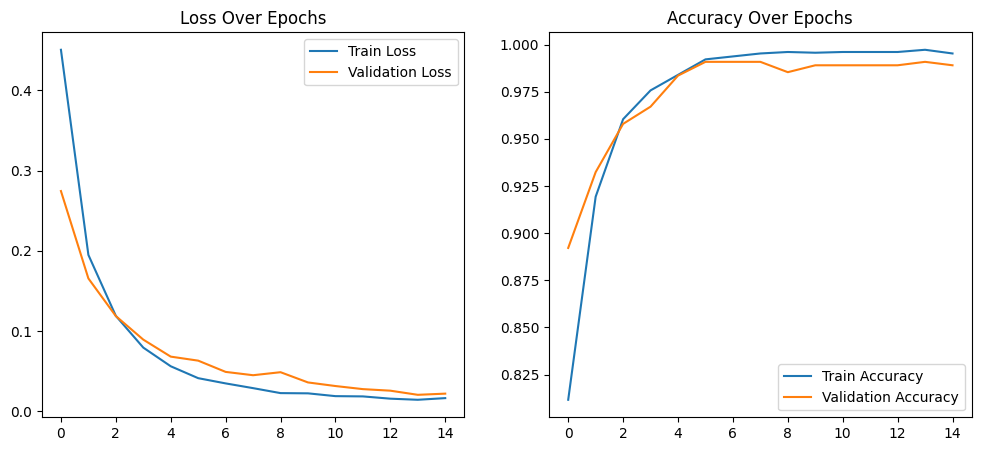

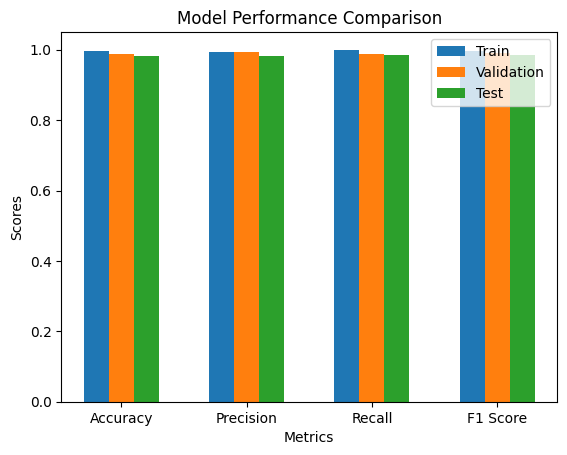

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv('data_to_model.csv')

# Preprocess the boolean columns
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Split data into features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predictions for metrics calculation
y_pred_train = (model.predict(X_train) > 0.5).flatten()
y_pred_val = (model.predict(X_val) > 0.5).flatten()
y_pred_test = (model.predict(X_test) > 0.5).flatten()

# Compute metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_pred_train),
        precision_score(y_train, y_pred_train),
        recall_score(y_train, y_pred_train),
        f1_score(y_train, y_pred_train)
    ],
    'Validation': [
        accuracy_score(y_val, y_pred_val),
        precision_score(y_val, y_pred_val),
        recall_score(y_val, y_pred_val),
        f1_score(y_val, y_pred_val)
    ],
    'Test': [
        accuracy_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        recall_score(y_test, y_pred_test),
        f1_score(y_test, y_pred_test)
    ]
}

metrics_df = pd.DataFrame(metrics_data)

# Save metrics to CSV
metrics_df.to_csv('MLP_metrics.csv', index=False)

# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

# Bar graph for metrics comparison
x = np.arange(len(metrics_data['Metric']))
width = 0.2

plt.bar(x - width, metrics_data['Train'], width, label='Train')
plt.bar(x, metrics_data['Validation'], width, label='Validation')
plt.bar(x + width, metrics_data['Test'], width, label='Test')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_data['Metric'])
plt.legend()

plt.show()
